In [14]:
import nibabel as nb
import numpy as np
import scipy.io
import scipy
from scipy import stats
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from ipynb.fs.full.utils import *
import statsmodels.api as sm
import statsmodels


In [2]:
Mean_FPPs_Activity = mean_FPPs_movie_data()

In [3]:
Mean_FPPs_Activity.shape

(5, 3655)

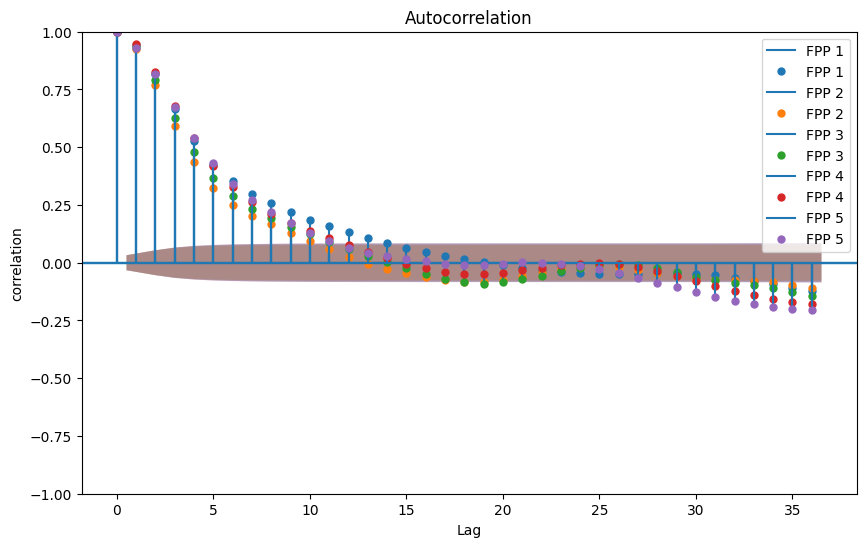

In [18]:
plt.figure(figsize=(10, 6))
for i in range(Mean_FPPs_Activity.shape[0]):
    statsmodels.graphics.tsaplots.plot_acf(Mean_FPPs_Activity[i], ax=plt.gca(), label=f'FPP {i+1}')
plt.xlabel('Lag')
plt.ylabel('correlation')
plt.legend()
plt.show()

In [49]:
autocorr = np.correlate(Mean_FPPs_Activity[0], Mean_FPPs_Activity[0], mode='same')


In [50]:
autocorr = autocorr[len(Mean_FPPs_Activity[0]) - 1:]

In [53]:
autocorr

array([-7.33921132])

ValueError: x and y must have same first dimension, but have shapes (3655,) and (0,)

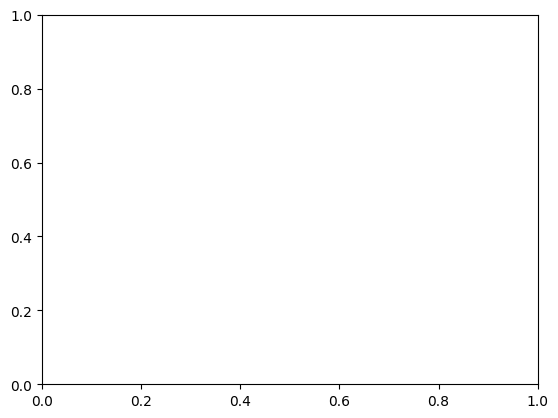

In [45]:
autocorrs = [np.correlate(data, data, mode='valid')[len(data) - 1:] for data in Mean_FPPs_Activity]

lags = np.arange(0, len(Mean_FPPs_Activity[0]))
for i, autocorr in enumerate(autocorrs):
    plt.plot(lags, autocorr, label=f'FPP {i+1}')

plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.xlim(0,100)
plt.legend()
plt.grid(True)
plt.show()

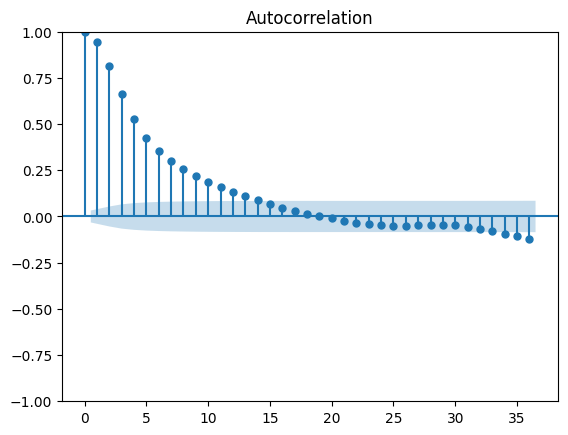

In [38]:
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot
plot_acf(Mean_FPPs_Activity[0])
pyplot.show()